# Setup Files

In [1]:
!ls

 01-07-21
 01-07-21.zip
 041021_hydrophone_data_analysis.ipynb
 25G_two_hydrophones_static.ipynb
 3.kml
 arduino-1.8.16-linux64.tar.xz
 Detecting_Square_Markers_in_Underwater_Environment.pdf
 high-throughput-07-00011.pdf
 IMG_20211113_150023.jpg
 jetbrains-toolbox
 kml_data
 manual.list
'ME3281_MACHNIE DRAWING PRACTICE_Assignment Booklet.pdf'
'ME3281_Part modeling_demo_2021.mp4'
 micromachines-05-01034.pdf
 moore2015_ros_robot-localisation.pdf
 MS583.zip
 old-useful
'outer the jetty KML data'
'outer the jetty KML data.zip'
 {out_file}
 PID3657209.pdf
 pool_hydrophone_data_analysis.ipynb
'position_data_zc (1).csv'
 position_data_zc.csv
 pt1_filt_signal.png
 pt1_raw_signal.png
'ROV logs w kml files (1).zip'
'ROV logs w kml files.zip'
 SensorFusionGPSIMULocalisation2018.pdf
 settings.html
 text_logs
 tub_hydrophone_data_analysis.ipynb
'Untitled (1).ipynb'
 Untitled2.ipynb
 Untitled.ipynb


In [2]:
zip_filename = 'ROV logs w kml files.zip'
!unzip -o '{zip_filename}'

Archive:  ROV logs w kml files.zip
  inflating: 01-07-21.zip            
  inflating: outer the jetty KML data.zip  


In [3]:
inner_zips = [' 01-07-21.zip', 'outer the jetty KML data.zip']

In [4]:
!unzip -o '01-07-21.zip'
!unzip -o 'outer the jetty KML data.zip'

Archive:  01-07-21.zip
  inflating: 01-07-21/10/Data.log    
  inflating: 01-07-21/11/Data.log    
  inflating: 01-07-21/12/Data.log    
  inflating: 01-07-21/1/Data.log     
  inflating: 01-07-21/2/Data.log     
  inflating: 01-07-21/3/Data.log     
  inflating: 01-07-21/4/Data.log     
  inflating: 01-07-21/5/Data.log     
  inflating: 01-07-21/6/Data.log     
  inflating: 01-07-21/7/Data.log     
  inflating: 01-07-21/9/Data.log     
Archive:  outer the jetty KML data.zip
  inflating: outer the jetty KML data/1.kml  
  inflating: outer the jetty KML data/10.kml  
  inflating: outer the jetty KML data/11.kml  
  inflating: outer the jetty KML data/12.kml  
  inflating: outer the jetty KML data/2.kml  
  inflating: outer the jetty KML data/3.kml  
  inflating: outer the jetty KML data/4.kml  
  inflating: outer the jetty KML data/5.kml  
  inflating: outer the jetty KML data/6.kml  
  inflating: outer the jetty KML data/7.kml  
  inflating: outer the jetty KML data/8.kml  
  inflating

In [5]:
!mv '01-07-21' 'text_logs' -f

mv: cannot move '01-07-21' to 'text_logs/01-07-21': Directory not empty


In [6]:
mv 'outer the jetty KML data' 'kml_data'

mv: cannot move 'outer the jetty KML data' to 'kml_data/outer the jetty KML data': Directory not empty


In [7]:
!ls 'text_logs' 'kml_data'

kml_data:
 10.kml   12.kml   2.kml   4.kml   6.kml   8.kml  'outer the jetty KML data'
 11.kml   1.kml    3.kml   5.kml   7.kml   9.kml

text_logs:
01-07-21  1  10  11  12  2  3  4  5  6	7  9


# Load Data

In [8]:
import numpy as np

In [233]:
run_num = '7'
out_file = '.tmp.output'

In [234]:
!cat ./kml_data/{run_num}.kml | grep -oP '(?<=<coordinates>)\K[0-9., ]*(?=</coordinates>)' > {out_file}

In [235]:
coords = tuple(tuple(map(float, l.split(','))) for l in open(out_file).read().strip().split(' '))

In [236]:
import pandas as pd

In [237]:
fix_data = []
for line in open(f"./text_logs/{run_num}/Data.log").read().strip().split('\n'):
    line = list(line)
    line[19] = '.'
    line[23] = ','
    fix_data.append(''.join(line))
fix_data = '\n'.join(fix_data)

In [238]:
from io import StringIO
df = pd.read_csv(StringIO(fix_data))

In [239]:
df = df.rename(columns={df.columns[0]: 'time', df.columns[1]: 'frontcameraFrameCount'})

In [240]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f').values.astype(np.int64) / 10**9
df['time'] -= df['time'][0]

In [241]:
# df[['time', 'depth', 'heading', 'pitch', 'roll']]

In [242]:
import matplotlib.pyplot as plt

In [243]:
coords = np.array(coords)[:, [1, 0, 2]]

In [244]:
df

,time,frontcameraFrameCount,bottomcameraFrameCount,depth,altitude,thickness,heading,pitch,roll,gps_lat,gps_lng,gps_acc,gps_state,Unnamed: 13
0,0.000,90.0,56.0,-0.2,13.112,0.0,61.017,-3.338,6.616,0.0,0.0,0.0,0.0,NaN
1,0.051,90.0,56.0,-0.2,13.112,0.0,60.219,-3.139,7.678,0.0,0.0,0.0,0.0,NaN
2,0.098,90.0,56.0,-0.2,13.112,0.0,60.219,-3.139,7.678,0.0,0.0,0.0,0.0,NaN
3,0.142,90.0,56.0,-0.2,13.065,0.0,60.219,-3.139,7.678,0.0,0.0,0.0,0.0,NaN
4,0.404,105.0,71.0,-0.2,13.065,0.0,59.706,-4.009,7.430,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,800.900,20930.0,20586.0,-0.3,13.137,0.0,228.751,-3.847,5.843,0.0,0.0,0.0,0.0,NaN
14318,800.927,20930.0,20586.0,-0.3,13.137,0.0,228.751,-3.847,5.843,0.0,0.0,0.0,0.0,NaN
14319,800.966,20930.0,20586.0,-0.3,13.137,0.0,228.778,-4.121,5.828,0.0,0.0,0.0,0.0,NaN
14320,800.993,20930.0,20586.0,-0.3,13.137,0.0,228.778,-4.121,5.828,0.0,0.0,0.0,0.0,NaN


In [245]:
alti = df[['altitude']].to_numpy()

In [246]:
imu = df[['heading', 'pitch', 'roll']].to_numpy()

In [247]:
imu.shape

(14322, 3)

In [248]:
# coords, imu
# Assume that they both span the same time

In [249]:
coords[0]

array([17.68955803, 83.30368805,  0.        ])

Text(0, 0.5, 'latitude ~ y')

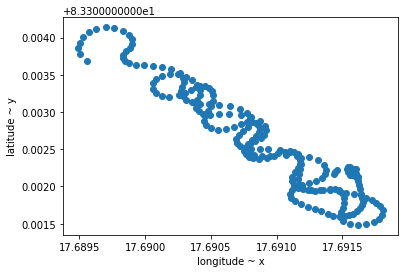

In [250]:
plt.scatter(*coords[:, :2].T)
plt.xlabel('longitude ~ x')
plt.ylabel('latitude ~ y')

In [251]:
v = np.linalg.norm(np.diff(coords, axis=0), axis=1)

In [252]:
_ = df[['time', 'heading', 'pitch', 'roll']].to_numpy()
t_imu = _[:, 0]
imu = _[:, 1:]

In [253]:
t_pos = np.arange(coords.shape[0]) / coords.shape[0] * t_imu[-1]
pos = coords.copy()

In [254]:
t_pos, pos
t_imu, imu
None

# Transfrom Frame of ```pos```

In [255]:
vel_g = np.diff(pos, axis=0)

In [256]:
yaw_pos = imu[np.argmin(np.abs(t_imu[None, :] - t_pos[:, None]), axis=1)[:-1], 0] * np.pi / 180

In [257]:
#global = [[cos, -sin],[sin, cos]] @ local
# local = [[cos, -sin],[sin, cos]]].inv() @ global
rot = np.moveaxis(np.array([
    [np.cos(yaw_pos), -np.sin(yaw_pos)],
    [np.sin(yaw_pos), np.cos(yaw_pos)],
]), 2, 0)

In [258]:
vel_l = (np.linalg.inv(rot) @ vel_g[:, :2].reshape(-1, 2, 1)).reshape(-1,2)

In [259]:
pos_l = np.cumsum(vel_l, axis=0)
pos_l = np.vstack((np.array([[0,0]]), pos_l))

# View Plots

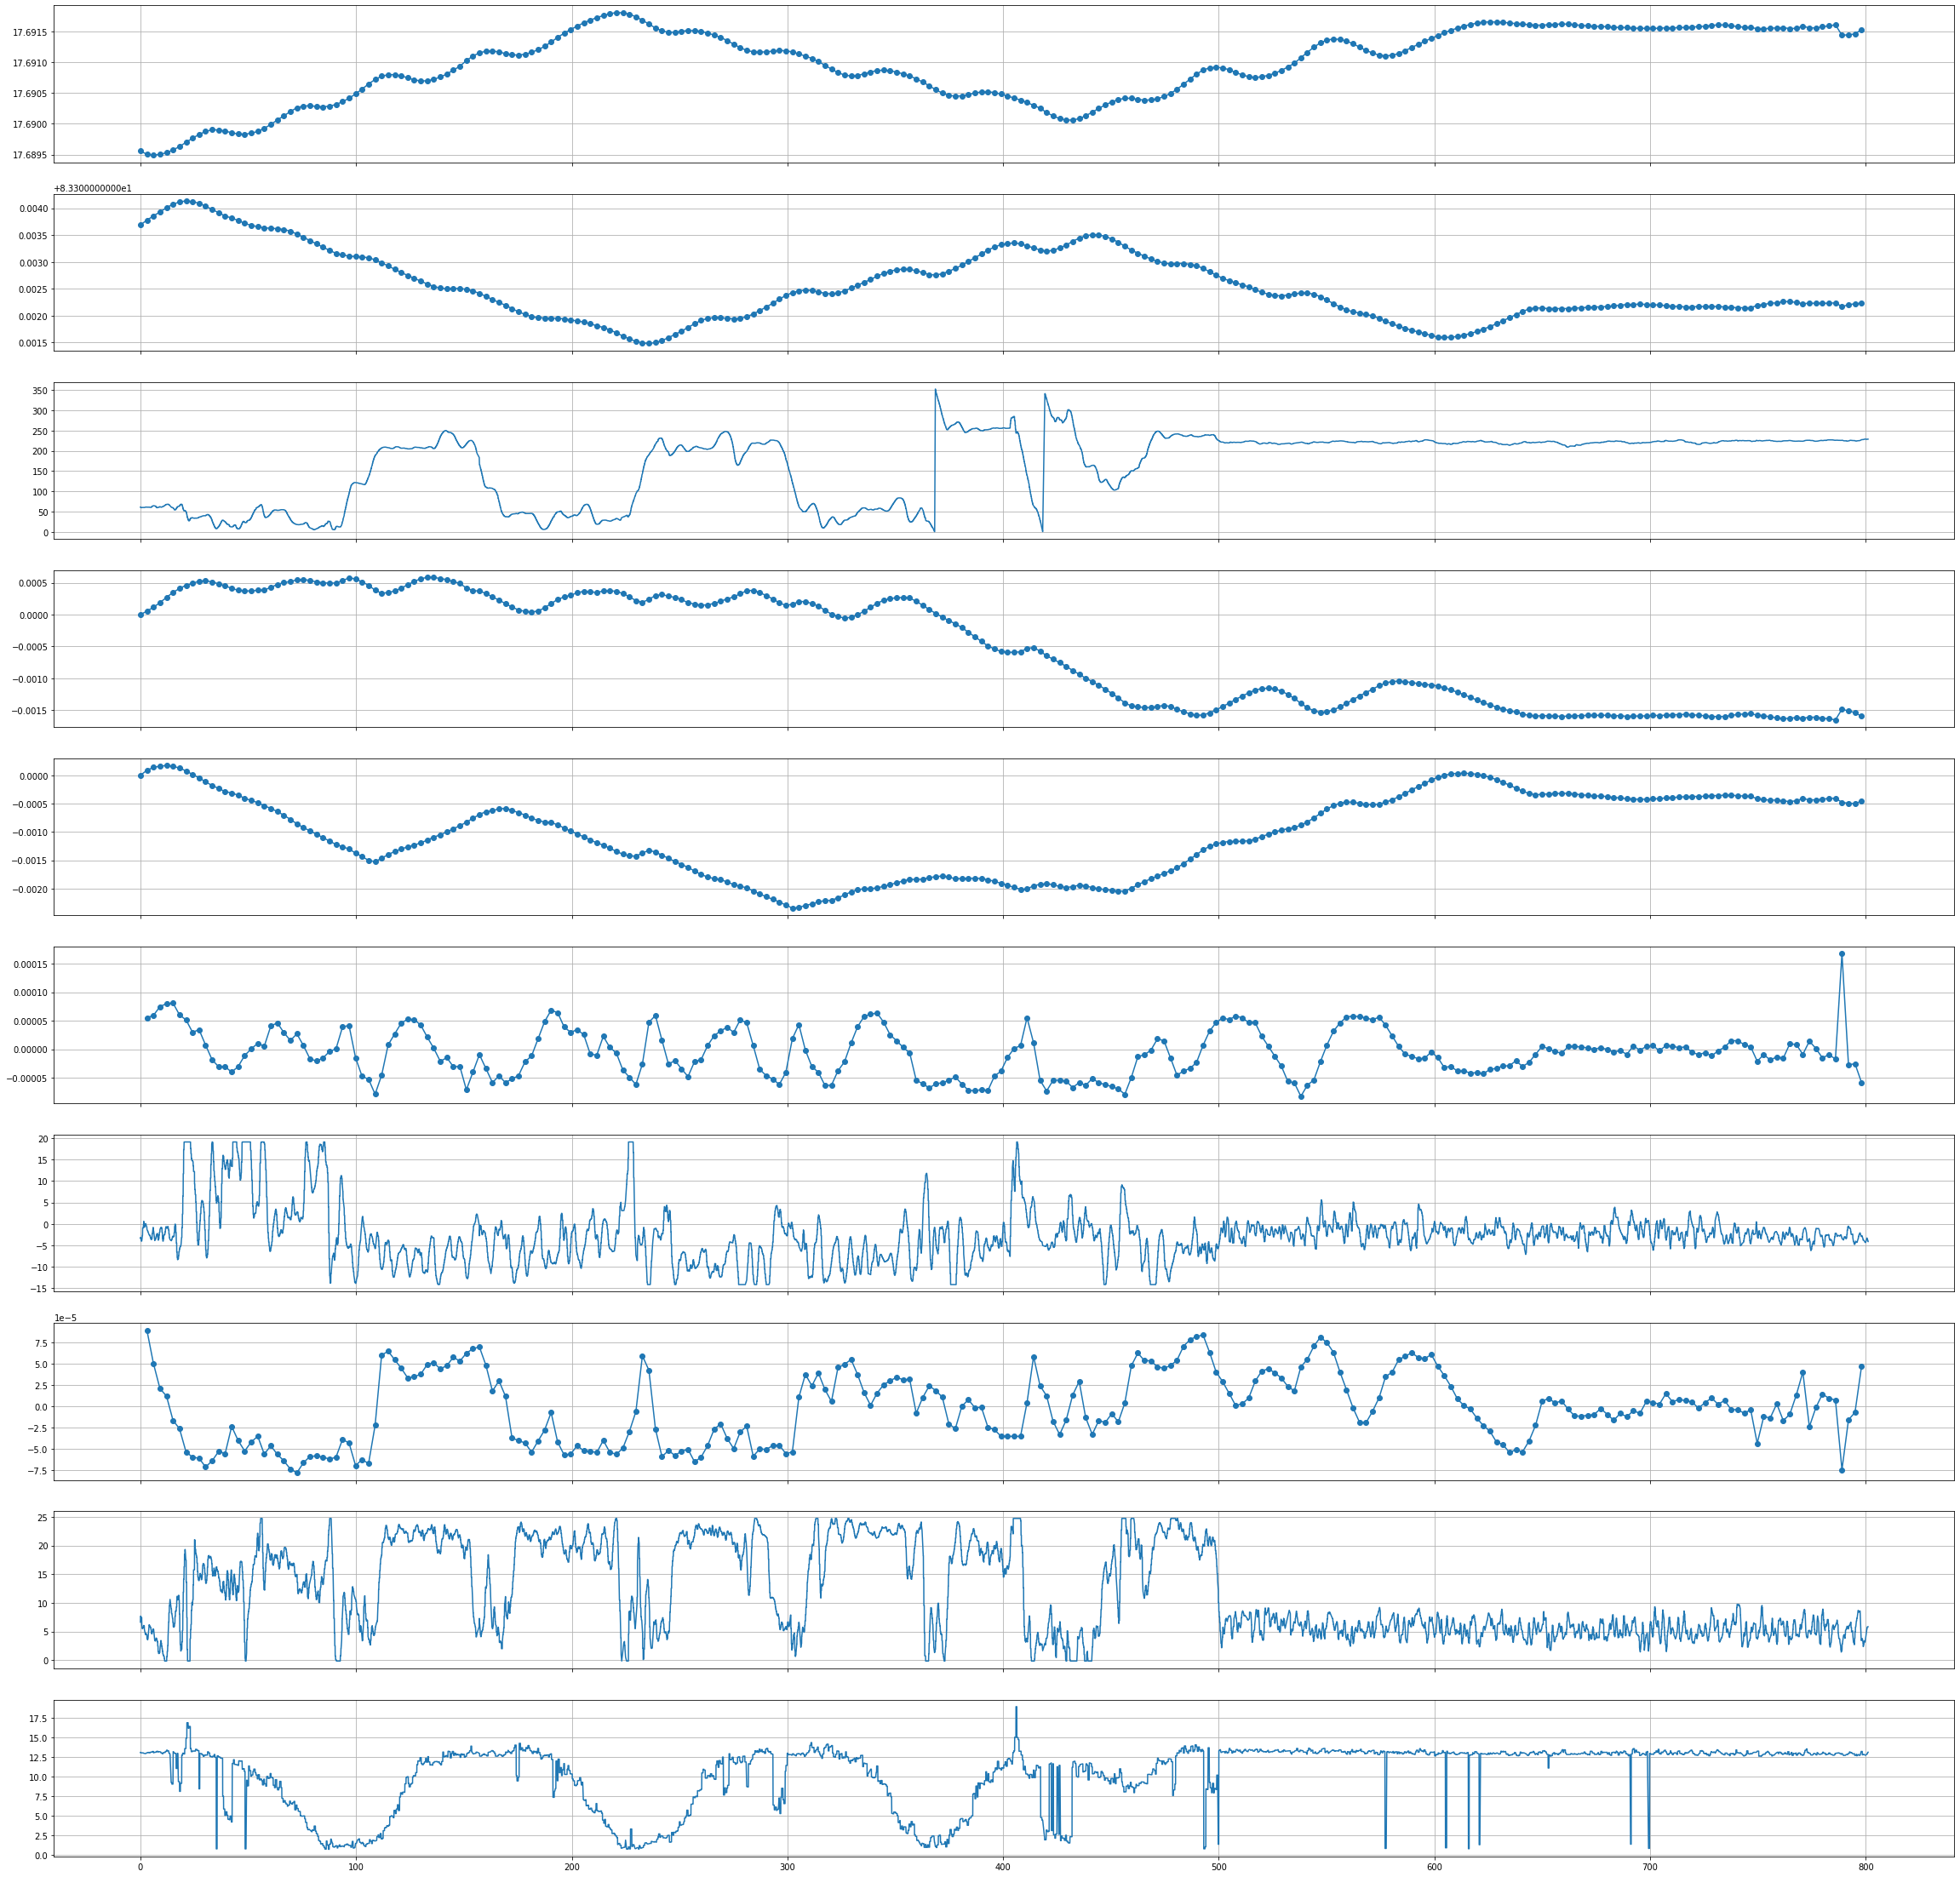

In [261]:
f, ax = plt.subplots(2 + 2  + 2 + 3 + 1, 1, figsize=(40, 4*10), sharex=True)
for a in ax:
    a.grid()
    
ait = iter(ax)
next(ait).plot(t_pos, pos[:,0], '-o') # x_g
next(ait).plot(t_pos, pos[:,1], '-o') # y_G
next(ait).plot(t_imu, imu[:,0]) # yaw
next(ait).plot(t_pos, pos_l[:,0], '-o') # x_l
next(ait).plot(t_pos, pos_l[:,1], '-o') # y_L

next(ait).plot(t_pos[1:], np.diff(pos_l[:,0]), '-o') # vx_l
next(ait).plot(t_imu, np.clip(imu[:,1], np.percentile(imu[:,1], 2), np.percentile(imu[:,1], 100 - 2))) # roll
next(ait).plot(t_pos[1:], np.diff(pos_l[:,1]), '-o') # vy_l
next(ait).plot(t_imu, np.clip(imu[:,2], np.percentile(imu[:,2], 2), np.percentile(imu[:,2], 100 - 2))) # pitch
next(ait).plot(t_imu, alti)


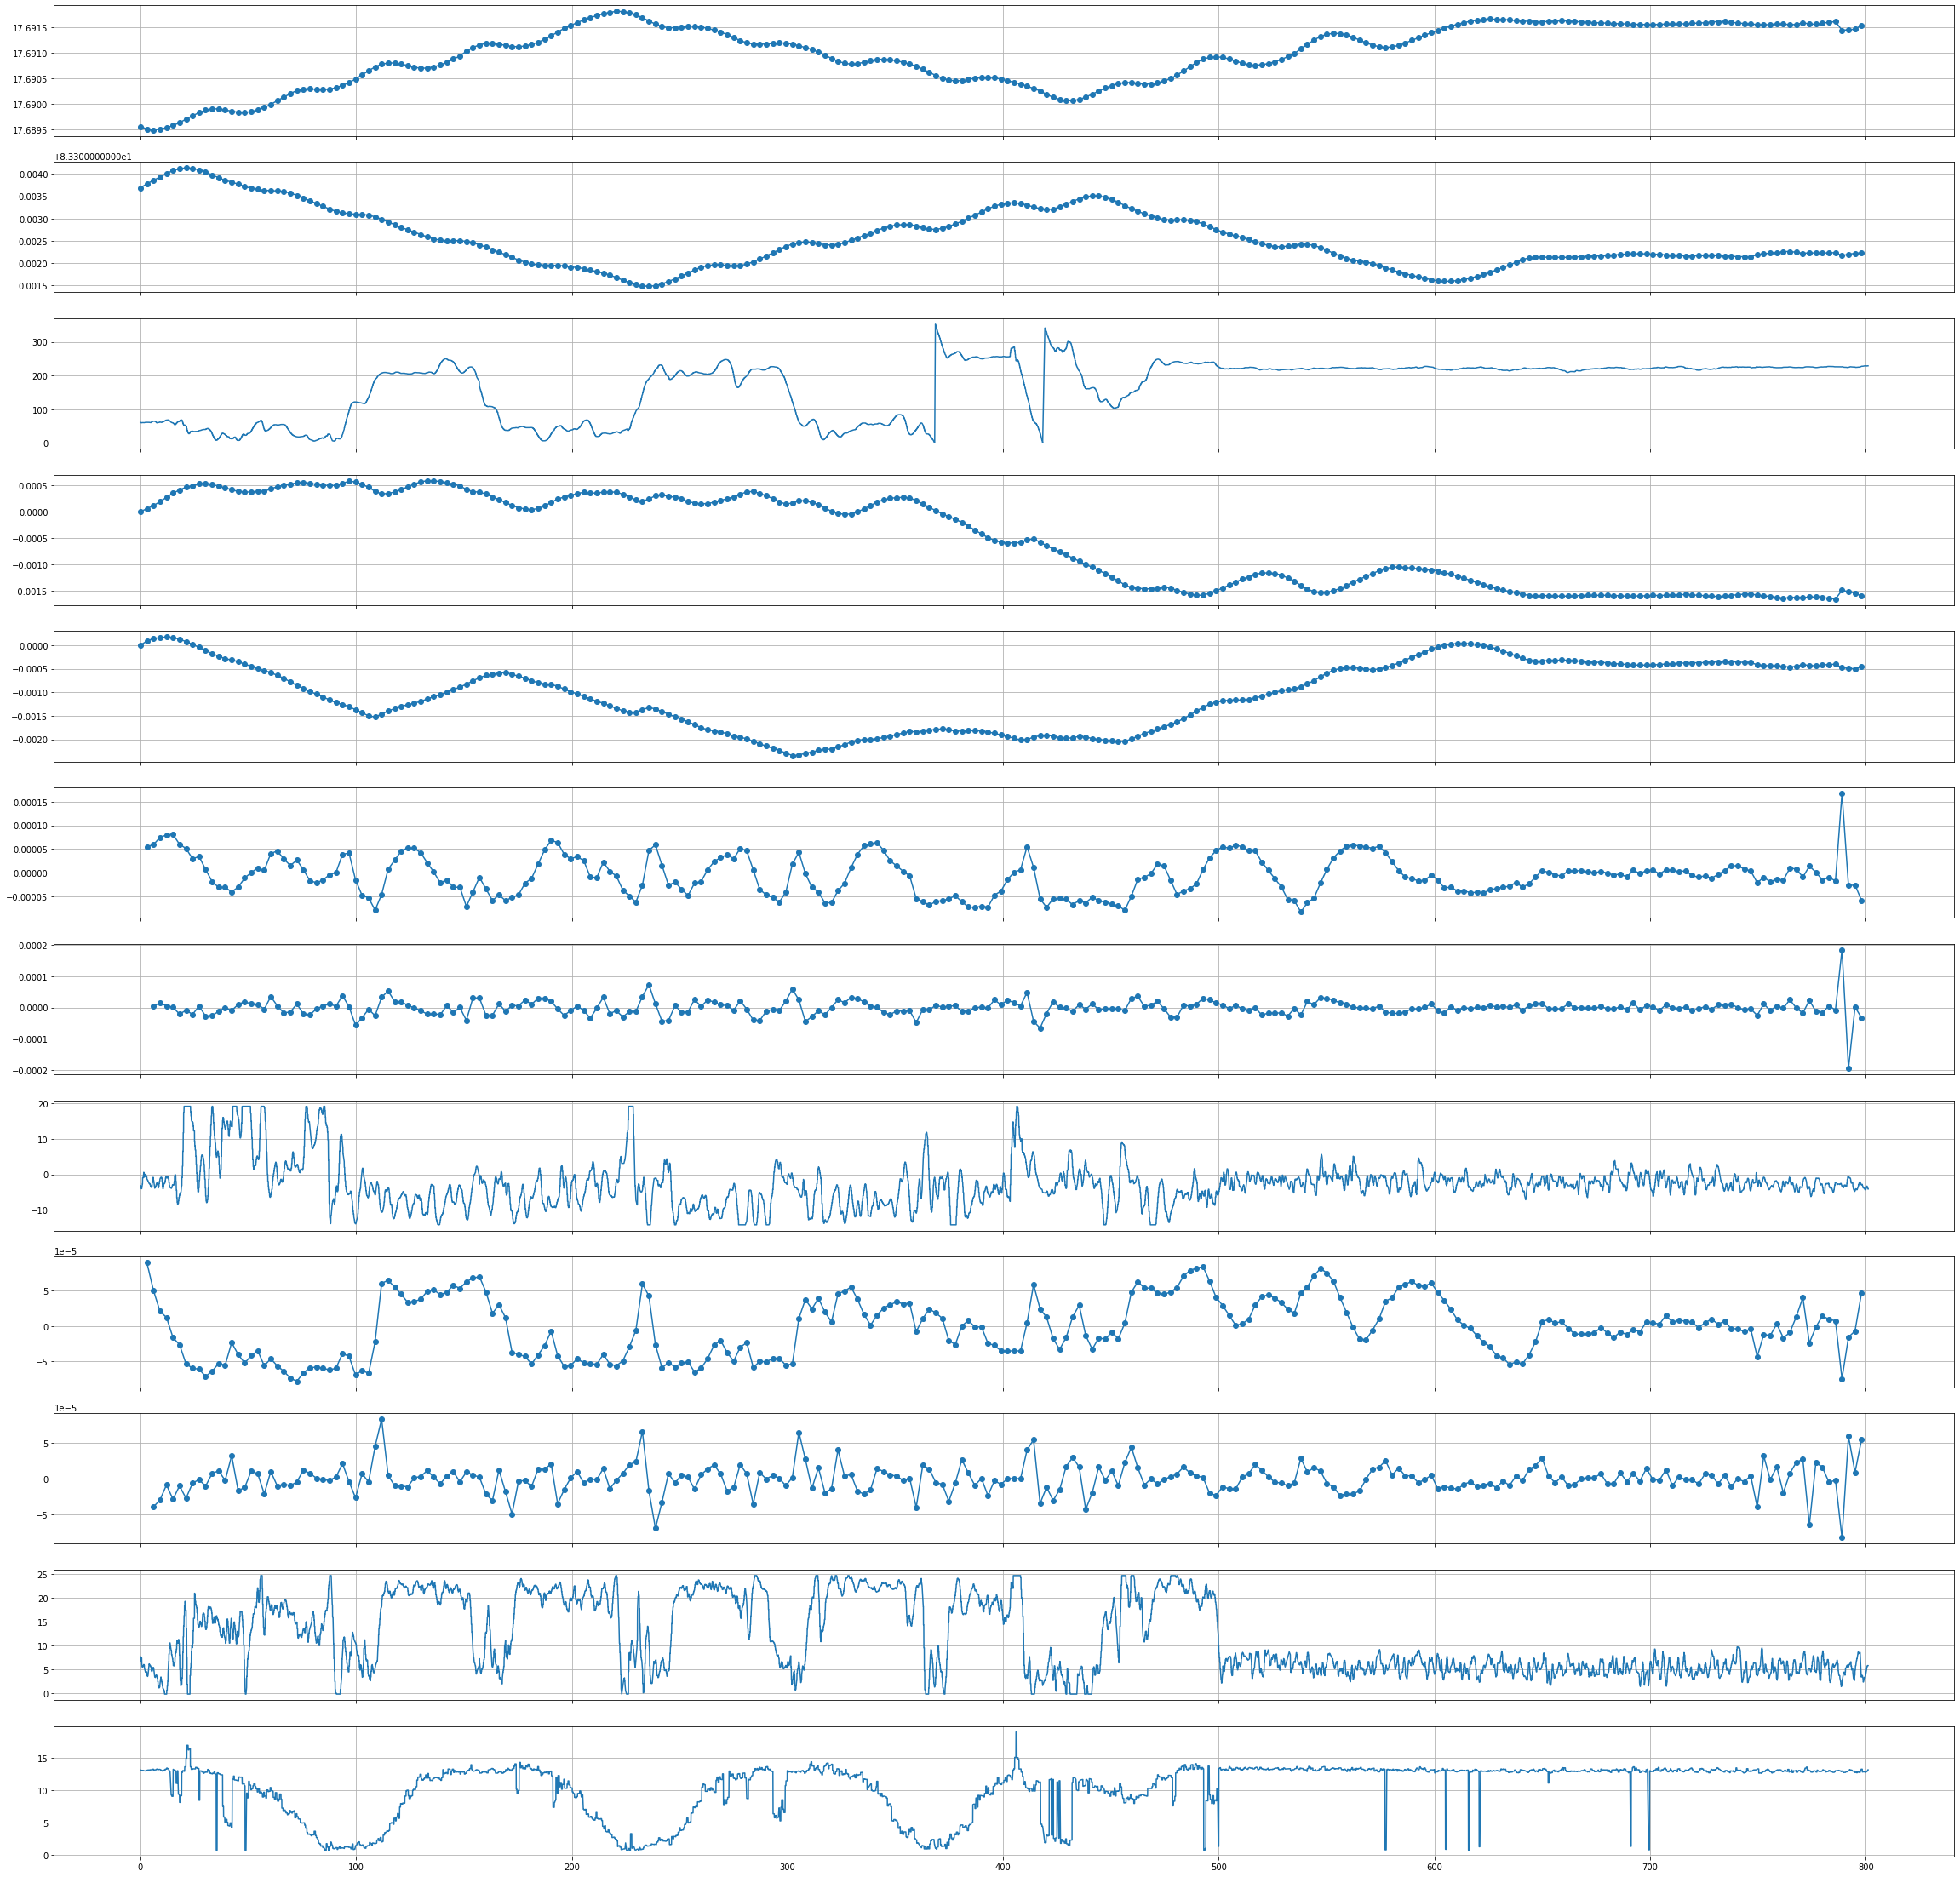

In [262]:
f, ax = plt.subplots(2 + 2 + 2 + 2 + 3 + 1, 1, figsize=(40, 4*10), sharex=True)
for a in ax:
    a.grid()
    
ait = iter(ax)
next(ait).plot(t_pos, pos[:,0], '-o') # x_g
next(ait).plot(t_pos, pos[:,1], '-o') # y_G
next(ait).plot(t_imu, imu[:,0]) # yaw
next(ait).plot(t_pos, pos_l[:,0], '-o') # x_l
next(ait).plot(t_pos, pos_l[:,1], '-o') # y_L

next(ait).plot(t_pos[1:], np.diff(pos_l[:,0]), '-o') # vx_l
next(ait).plot(t_pos[2:], np.diff(np.diff(pos_l[:,0])), '-o') # vx_l
next(ait).plot(t_imu, np.clip(imu[:,1], np.percentile(imu[:,1], 2), np.percentile(imu[:,1], 100 - 2))) # roll
next(ait).plot(t_pos[1:], np.diff(pos_l[:,1]), '-o') # vy_l
next(ait).plot(t_pos[2:], np.diff(np.diff(pos_l[:,1])), '-o') # vy_l
next(ait).plot(t_imu, np.clip(imu[:,2], np.percentile(imu[:,2], 2), np.percentile(imu[:,2], 100 - 2))) # pitch
next(ait).plot(t_imu, alti)


# One Example
```v_x_local```  
```roll```  
```v_x_local```  
```pitch```  


For file 2:

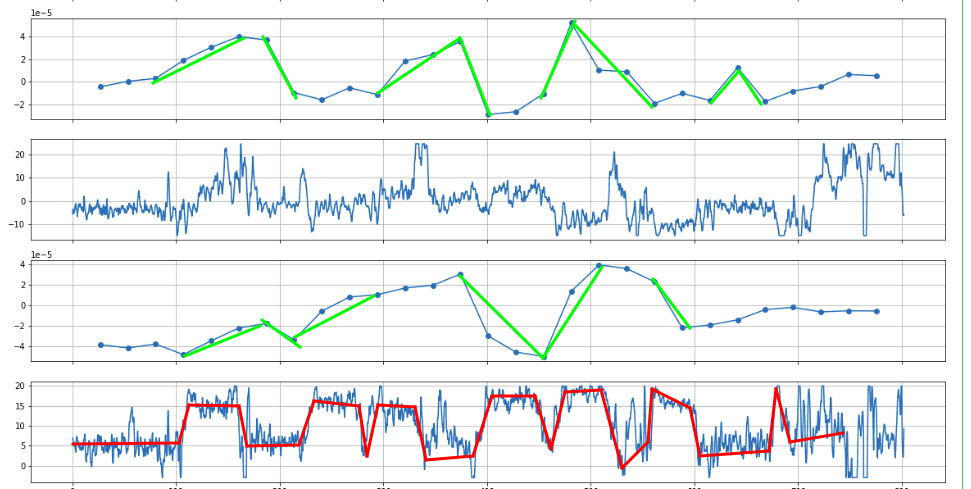

# AA